<a href="https://colab.research.google.com/github/Prisha22/Cavity-Flow/blob/main/Cavity_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Using Navier-Stokes equations for simulation of cavity-lid flow.
The equations are:

##### Momentum Equation in Vector Form:
$$
\frac{\partial \vec{v}}{\partial t} + (\vec{v} \cdot \nabla) \vec{v} = -\frac{1}{\rho} \nabla p + \nu \nabla^2 \vec{v}
$$

---

##### Scalar Form of Momentum Equations (2D):
#### For the \(u\)-component:
$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = -\frac{1}{\rho} \frac{\partial p}{\partial x} + \nu \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
$$

##### For the \(v\)-component:
$$
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = -\frac{1}{\rho} \frac{\partial p}{\partial y} + \nu \left( \frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2} \right)
$$

---

##### Poisson Equation for Pressure:
$$
\frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2} = -\rho \left( \frac{\partial u}{\partial x} \frac{\partial u}{\partial x} + 2 \frac{\partial u}{\partial y} \frac{\partial v}{\partial x} + \frac{\partial v}{\partial y} \frac{\partial v}{\partial y} \right)
$$

---

### Discretization Schemes

#### **Time Derivative**:
The time derivative uses a forward difference scheme:
$$
\frac{\partial u}{\partial t} \approx \frac{u^{n+1} - u^n}{\Delta t}
$$



#### **First Derivative (Advection)**:
**Central Difference Scheme**:
:
$$
\frac{\partial u}{\partial x} \approx \frac{u_{i+1,j} - u_{i-1,j}}{2 \Delta x}
$$

**Upwind Scheme** (for stability):
$$
\frac{\partial u}{\partial x} \approx \frac{u_{i,j} - u_{i-1,j}}{\Delta x}
$$



#### **Second Derivative (Diffusion)**:
**Central Difference Scheme**:
For terms like :
$$
\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{\Delta x^2}
$$

$$
\frac{\partial^2 u}{\partial y^2} \approx \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{\Delta y^2}
$$

---

#### **Pressure-Poisson Equation**:
Discretized as:
$$
\frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2} \approx \frac{p_{i+1,j} - 2p_{i,j} + p_{i-1,j}}{\Delta x^2} + \frac{p_{i,j+1} - 2p_{i,j} + p_{i,j-1}}{\Delta y^2}
$$


---
#### The boundary conditions are as follows:

u=1 at y=2 ("the lid")

u,v=0
 on the other boundaries

∂p/∂y=0 at y=0

p=0 at y=2

∂p/∂x=0 a x=0,2

Reference: https://github.com/Angelo1211/CFDPython/blob/master/README.md

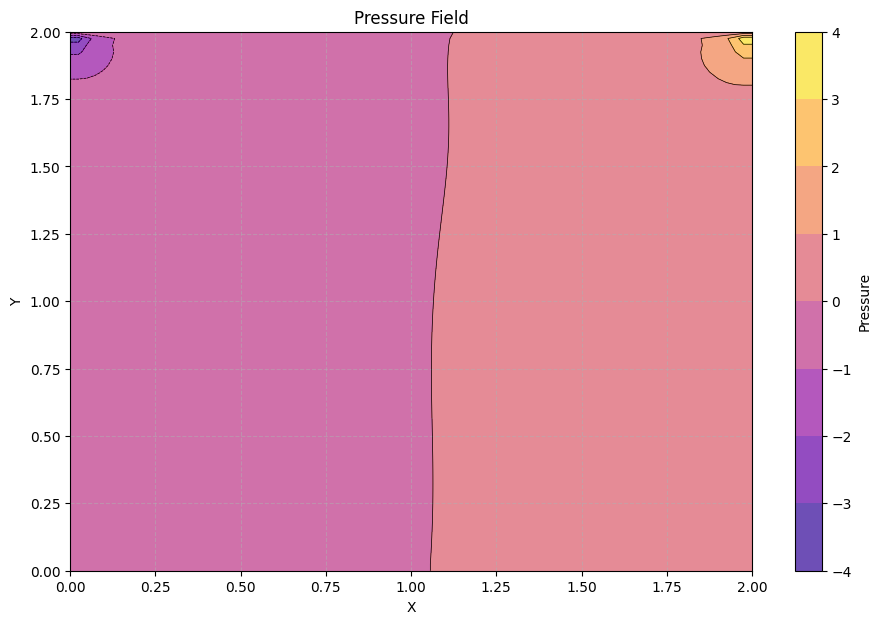

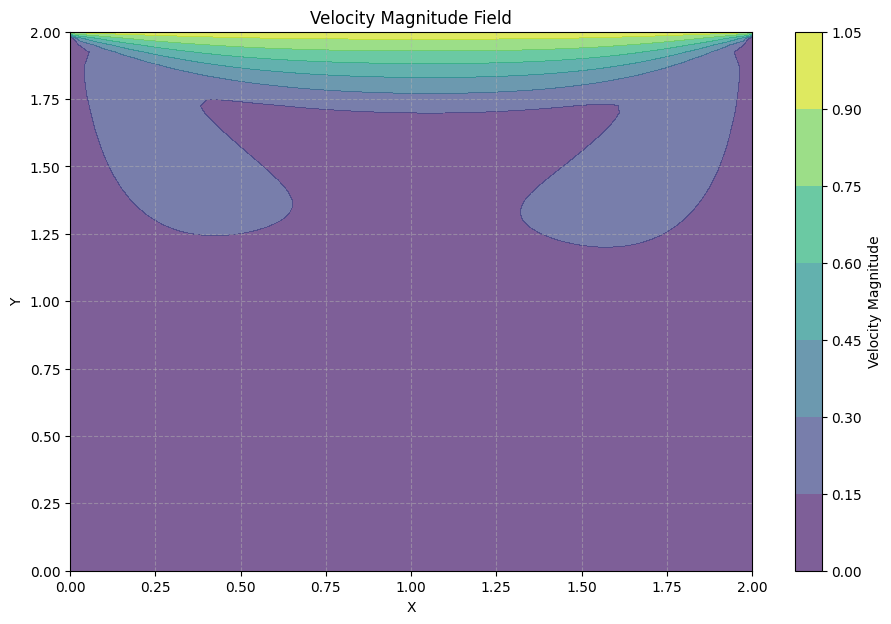

In [2]:
# Importing necessary libraries
import numpy as np
from matplotlib import pyplot
from matplotlib import cm

nx = 81
ny = 81
nt = 500
nit = 50
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
X, Y = np.meshgrid(x, y)

rho = 1
nu = 0.1
dt = 0.001

u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))

for n in range(nt):
    un = u.copy()
    vn = v.copy()

    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, :-2]) * dy**2 +
                          (pn[2:, 1:-1] + pn[:-2, 1:-1]) * dx**2) /
                         (2 * (dx**2 + dy**2)) -
                         dx**2 * dy**2 / (2 * (dx**2 + dy**2)) *
                         (rho * (1 / dt *
                                 ((u[1:-1, 2:] - u[1:-1, :-2]) / (2 * dx) +
                                  (v[2:, 1:-1] - v[:-2, 1:-1]) / (2 * dy)) -
                                 ((u[1:-1, 2:] - u[1:-1, :-2]) / (2 * dx))**2 -
                                 2 * ((u[2:, 1:-1] - u[:-2, 1:-1]) / (2 * dy) *
                                      (v[1:-1, 2:] - v[1:-1, :-2]) / (2 * dx)) -
                                 ((v[2:, 1:-1] - v[:-2, 1:-1]) / (2 * dy))**2)))

        # Pressure boundary conditions
        p[:, -1] = p[:, -2]  # dp/dx = 0 at x = 2
        p[0, :] = p[1, :]    # dp/dy = 0 at y = 0
        p[:, 0] = p[:, 1]    # dp/dx = 0 at x = 0
        p[-1, :] = 0         # p = 0 at y = 2


    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     un[1:-1, 1:-1] * dt / dx *
                     (un[1:-1, 1:-1] - un[1:-1, :-2]) -
                     vn[1:-1, 1:-1] * dt / dy *
                     (un[1:-1, 1:-1] - un[:-2, 1:-1]) -
                     dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, :-2]) +
                     nu * (dt / dx**2 *
                           (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, :-2]) +
                           dt / dy**2 *
                           (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[:-2, 1:-1])))

    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] -
                     un[1:-1, 1:-1] * dt / dx *
                     (vn[1:-1, 1:-1] - vn[1:-1, :-2]) -
                     vn[1:-1, 1:-1] * dt / dy *
                     (vn[1:-1, 1:-1] - vn[:-2, 1:-1]) -
                     dt / (2 * rho * dy) * (p[2:, 1:-1] - p[:-2, 1:-1]) +
                     nu * (dt / dx**2 *
                           (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, :-2]) +
                           dt / dy**2 *
                           (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[:-2, 1:-1])))


    u[0, :] = 0
    u[:, 0] = 0
    u[:, -1] = 0
    u[-1, :] = 1  # inlet velocity
    v[0, :] = 0
    v[-1, :] = 0
    v[:, 0] = 0
    v[:, -1] = 0

# visualize
fig1 = pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.contourf(X, Y, p, alpha=0.7, cmap='plasma')
pyplot.colorbar(label="Pressure")
pyplot.contour(X, Y, p, colors='black', linewidths=0.5)
pyplot.xlabel('X')
pyplot.ylabel('Y')
pyplot.title('Pressure Field')
pyplot.grid(True, linestyle='--', alpha=0.5)
pyplot.show()

fig2 = pyplot.figure(figsize=(11, 7), dpi=100)
magnitude = np.sqrt(u**2 + v**2)
pyplot.contourf(X, Y, magnitude, alpha=0.7, cmap='viridis')
pyplot.colorbar(label="Velocity Magnitude")
pyplot.xlabel('X')
pyplot.ylabel('Y')
pyplot.title('Velocity Magnitude Field')
pyplot.grid(True, linestyle='--', alpha=0.5)
pyplot.show()
